In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
# cols =['DateStart','AdsetId','LinkClick','Conversions','Impressions','Spend']
# data = pd.read_csv('RagingBull_FB_Hourly.csv', usecols=cols)
# data.to_csv('Final_Set')
# data.fillna(0,inplace=True)

In [201]:
data = pd.read_csv('Final_Set')
data.fillna(0, inplace= True)

In [202]:
data['CTR'] = (data['LinkClick']/data['Impressions']).replace([np.inf, -np.inf], 0)

In [203]:
data.head()

,Unnamed: 0,Spend,DateStart,LinkClick,Impressions,AdsetId,Conversions,CTR
0,0,1.58,2018-07-12,0.0,27.0,6094650899637,0.0,0.0
1,1,0.02,2018-05-18,0.0,3.0,6093425908037,0.0,0.0
2,2,0.02,2018-05-26,0.0,2.0,6093224252437,0.0,0.0
3,3,0.04,2018-06-07,0.0,7.0,6094650898437,0.0,0.0
4,4,0.04,2018-06-04,0.0,2.0,6095173565837,0.0,0.0


In [204]:
data_total_IPS = pd.pivot_table(data = data, values= ['Spend','Impressions'], fill_value= 0, index='AdsetId',aggfunc='sum')

In [205]:
data_total_IPS['IPS'] = (data_total_IPS['Impressions']/ data_total_IPS['Spend']).replace([np.inf, -np.inf], 0)

In [206]:
data_total_IPS.drop(['Impressions','Spend'], axis=1, inplace=True)

In [207]:
ads_IPS = data_total_IPS.values

In [208]:
data_total_CTR = pd.pivot_table(data = data, values= ['LinkClick','Impressions'], fill_value= 0, index='AdsetId',aggfunc='sum')

In [209]:
data_total_CTR['CTR_agg'] = (data_total_CTR['LinkClick']/data_total_CTR['Impressions']).replace([np.inf, -np.inf], 0)
data_total_CTR.drop(['LinkClick','Impressions'],inplace = True, axis = 1)
data_first_row = pd.pivot_table(data = data_total_CTR, values= ['CTR_agg'],columns='AdsetId').replace([np.inf, -np.inf], 0)

In [210]:
data_total_CTR.head()

,CTR_agg
AdsetId,
6082903610237,0.013802
6082903612037,0.013670
6082903614437,0.010551
6082903615637,0.009154
6082903618837,0.012005


In [211]:
data = data.join(data_total_CTR, on = ['AdsetId'])

In [212]:
data = data[data['CTR_agg'] > 0]

In [213]:
data.drop(['CTR_agg'], inplace= True, axis = 1)

In [214]:
data.head()

,Unnamed: 0,Spend,DateStart,LinkClick,Impressions,AdsetId,Conversions,CTR
0,0,1.58,2018-07-12,0.0,27.0,6094650899637,0.0,0.0
1,1,0.02,2018-05-18,0.0,3.0,6093425908037,0.0,0.0
2,2,0.02,2018-05-26,0.0,2.0,6093224252437,0.0,0.0
3,3,0.04,2018-06-07,0.0,7.0,6094650898437,0.0,0.0
4,4,0.04,2018-06-04,0.0,2.0,6095173565837,0.0,0.0


In [215]:
data.shape

(438872, 8)

In [216]:
len(set(data['AdsetId']))

242

In [217]:
opt_data = (data[['DateStart','AdsetId','CTR']].copy(deep = True))

In [218]:
data_final = pd.pivot_table(data=opt_data, values= 'CTR', columns='AdsetId',fill_value= 0,index='DateStart',aggfunc='sum').reset_index()
data_final.drop('DateStart',inplace= True, axis=1)
data_final.shape

(130, 242)

In [219]:
# data_initial_set = pd.pivot_table(data = data, values= ['LinkClick','conversions'], fill_value= 0, index='id',aggfunc='sum')

In [220]:
# data_initial_set['TotalClicksperConversion'] = (data_initial_set['LinkClick']/data_initial_set['Conversions']).replace([np.inf, -np.inf,np.NAN], 0)

In [221]:
# data_initial_set = pd.pivot_table(data = data_initial_set, columns= 'id', values= 'TotalClicksperConversion', fill_value= 0).reset_index()

In [222]:
# data_initial_set.drop('index',inplace= True,axis =1)

In [223]:
# data_initial_set

In [224]:
# import gc
# del opt_data
# # del raw_data
# gc.collect()

In [225]:
len_data_final = data_final.shape[1]
df = pd.DataFrame()
appender = data_first_row.iloc[[0]]
while len_data_final >= 0:
    df = df.append(appender,ignore_index= True)
    len_data_final -= 1
df.shape 

(243, 242)

In [226]:
data_final = df.append(data_final)
data_final.shape

(373, 242)

In [227]:
import random
import math
from collections import defaultdict
N = data_final.shape[0]
d = data_final.shape[1]
Exp = 10 ###Number of experiments
experiment_data = defaultdict()
for exp in range(Exp):
    id_reward_map = defaultdict()
    id_reward_map = {}
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0
    reward = 0
    for key, value in enumerate(data_final.columns):
        id_reward_map[key] = [0, value, 0]

    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    #         print("Ad id {}  Max random .{}  Random beta .{}".format(i, max_random, random_beta))
    #         print("".format())
            if random_beta > max_random:
                max_random = random_beta
                ad = i
    #             print(ad)
                id_reward_map[ad][0] += 1
        #     print(ads_selected)
                reward = data_final.values[n, ad]
                if reward > 0:
                    numbers_of_rewards_1[ad]+= 1
                    id_reward_map[ad][2]+=reward
                    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
                    total_reward += reward
                else:
                    numbers_of_rewards_0[ad]+= 1
#             print("Reward {}".format(reward))
#             print("Total re")
                
    experiment_data[exp] = {'id_reward_map': id_reward_map, 'total_reward': total_reward}

    #Visualising the results
    # plt.hist(id_reward_map[1])
    # plt.title('Histogram of ads selections')
    # plt.xlabel('Ads')
    # plt.ylabel('Number of times each ad was selected')
    # plt.show()

In [228]:
val = sorted([(value['total_reward'],key) for (key,value) in experiment_data.items()], reverse=True)[:1]
val
total_weights = val[0][0]
experiment_selected = val[0][1]

In [229]:
# Weights_selected = 
ad_weights = defaultdict()
for key, value in experiment_data.items():
    for k,val in value['id_reward_map'].items():
        ad_weights[val[1]] = (val[2], val[2]/total_reward)
        

In [310]:
pd.DataFrame(id_reward_map).to_csv('Reward_Map')

In [308]:
print(ad_weights)

defaultdict(None, {6082903610237: (4.7682042539023115, 0.012424399750250647), 6082903612037: (0.6288079987501952, 0.0016384704862912934), 6082903614437: (0.7623700848520973, 0.0019864901307621334), 6082903615637: (0.09153763754990747, 0.00023851750901460127), 6082903618837: (0.08403151181693135, 0.00021895897047132995), 6082903621237: (0.0913907284768212, 0.00023813471143426085), 6088935250037: (0.047715736040609136, 0.00012433179188177363), 6088935251437: (2.794815422692565, 0.007282386028509585), 6088935252837: (0.040578458881933954, 0.00010573435355367757), 6089948390437: (0, 0.0), 6089948393437: (2.205720302452544, 0.005747394472979224), 6093223857637: (3.4617640990351983, 0.009020238797924773), 6093223982237: (15.005360173531567, 0.03909912060496772), 6093224252437: (4.490203804756338, 0.011700020397559947), 6093225129837: (7.826027171825392, 0.020392098337546228), 6093225348037: (14.265701694040168, 0.03717180957999584), 6093225829037: (71.62266444529958, 0.18662552333369423), 60

In [231]:
print(sum(x[1] for x in ad_weights.values()))

0.9999999999999992


In [232]:
total_reward

383.777433900267

In [314]:
pd.DataFrame(ad_weights).to_csv('Reward_Map.csv')

In [235]:
import scipy
from scipy.optimize import linprog

In [236]:
ads = []
ads_CTR = []
ad_weight_ratio = []
for key, value in ad_weights.items():
    ads.append(key)
    ads_CTR.append(value[0])
    ad_weight_ratio.append(value[1])

In [311]:
print(sum(ad_weight_ratio))

0.9999999999999992


In [239]:
IPS=np.zeros((len(set(data['AdsetId'])),len(set(data['AdsetId']))))
np.fill_diagonal(IPS,ads_IPS*(-1))

In [241]:
budget = np.ones_like(ads_CTR)

In [243]:
A=np.vstack((budget,ad_weight_ratio,IPS))

In [245]:
c = np.array(ads_CTR).reshape(-1,1)

In [322]:
total_budget = 100000
second_budget = 70000
b = np.hstack((total_budget, second_budget, ([-100] * len(budget)))).reshape(-1,1)
bounds = [(0, None) for x in range(len(budget))]

In [323]:
res = linprog(c,A_ub=A,b_ub=b,bounds=bounds,method='interior-point',options={"disp": True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1621.499441541      
0.008284151416869   0.008284151416872   0.00828414875694    1.0              0.008284151416852   3173.396794451      
4.20452577425e-07   4.204525766305e-07  4.205366710096e-07  0.9999492518777  4.204525779642e-07  3212.375931667      
2.102262897999e-11  2.102371865951e-11  1.032642322353e-11  0.9999499999997  2.102262900846e-11  3212.375929126      
The algorithm terminated successfully and determined that the problem is infeasible.


In [324]:
print(sum(list(res.x)))

962.5099346692159


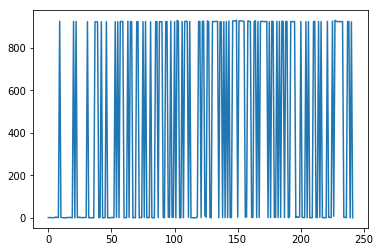

In [318]:
plt.plot(res.x)

In [320]:
ads_allotment = dict(zip(ads, weights_ctr_matrix))

In [321]:
sorted([(value[1],value[0]) for (key,value) in ads_allotment.items()], reverse=True)

[(array([0.04058785]), 921.0107988191044),
 (array([0.03135402]), 7.309996779965676),
 (array([0.02785679]), 4.799436000364133),
 (array([0.0273953]), 2.275960992131584),
 (array([0.0262335]), 2.8564107031404324),
 (array([0.02613876]), 923.422923726077),
 (array([0.02567568]), 927.8414873334556),
 (array([0.02559242]), 920.5286398888546),
 (array([0.0249273]), 923.430755704444),
 (array([0.02486691]), 6.533903059238026),
 (array([0.02447448]), 4.843499306656931),
 (array([0.02081492]), 4.03550422106306),
 (array([0.02081345]), 3.438275293649055),
 (array([0.02059154]), 2.011980539121417),
 (array([0.02053438]), 3.490540170217467),
 (array([0.02022666]), 923.9166154916784),
 (array([0.020195]), 923.0433812707556),
 (array([0.0200524]), 922.2713477864115),
 (array([0.01984374]), 921.7414411765333),
 (array([0.019701]), 921.6942207162097),
 (array([0.01912734]), 923.3151423598088),
 (array([0.01906438]), 921.9546433403203),
 (array([0.01903617]), 3.2686308514802924),
 (array([0.01879949]

In [304]:
pd.DataFrame(ads_allotment).to_csv('Ads_Allotment')